In [3]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
# !pip install matplotlib
# !pip install seaborn
# !pip install smogn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import smogn
from sklearn import metrics   

### Data details

In [4]:
train_data=pd.read_csv('../Datasets/traindata.csv')
test_data=pd.read_csv('../Datasets/testdata.csv')

In [5]:
print('Train_data_details \n Shape: {}\n Columns:\n\t{}\n '.format(train_data.shape ,train_data.columns,train_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Columns: 215 entries, ID to TARGET
dtypes: float64(60), int64(155)
memory usage: 23.0 MB
Train_data_details 
 Shape: (13999, 215)
 Columns:
	Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var13_medio_ult1', 'saldo_medio_var17_ult3',
       'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3',
       'saldo_medio_var29_ult1', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace3', 'var38', 'TARGET'],
      dtype='object', length=215)
 


In [17]:
print('Non_zero values\n',train_data.astype(bool).sum(axis=0),'\n')
print('Zero\n',(train_data == 0).astype(int).sum(axis=0),'\n')


Non_zero values
 ID                         13999
var3                       13986
var15                      13999
imp_ent_var16_ult1           724
imp_op_var39_comer_ult1     1831
                           ...  
saldo_medio_var33_hace3        5
saldo_medio_var33_ult3         7
saldo_medio_var44_hace3        6
var38                      13999
TARGET                      1284
Length: 215, dtype: int64 

Zero
 ID                             0
var3                          13
var15                          0
imp_ent_var16_ult1         13275
imp_op_var39_comer_ult1    12168
                           ...  
saldo_medio_var33_hace3    13994
saldo_medio_var33_ult3     13992
saldo_medio_var44_hace3    13993
var38                          0
TARGET                     12715
Length: 215, dtype: int64 



In [19]:
print(train_data.shape)
df=train_data.loc[:, (train_data != 0).any(axis=0)]
print(df.shape)

(13999, 215)
(13999, 179)


##### Remove Columns where count of columns values is more 70% ZEROS
AS oberved most feature values are zeros and also remaining ones are been unwanted as no of columns are more unable to visulaize corr() 

Features_shape	(13999, 13) Label_shape	(13999,)


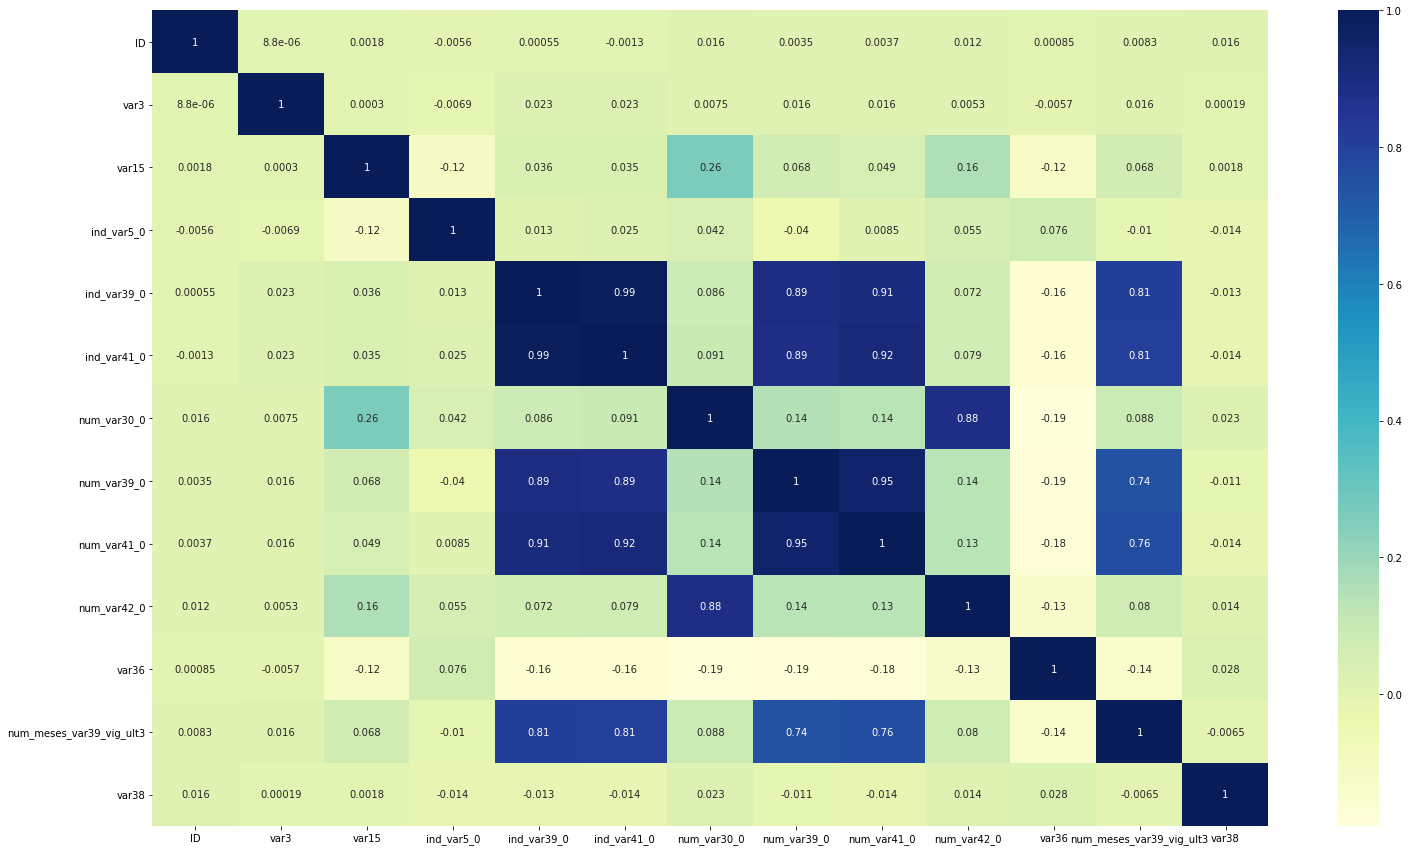

In [29]:
#Drop columns with more than 20% zeros
features_df_1 = train_data.loc[:, (train_data==0).mean() < .20] 
print('Features_shape\t{} Label_shape\t{}'.format(features_df_1.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_1.corr(), annot=True,cmap="YlGnBu")


Features_shape	(13999, 27) Label_shape	(13999,)


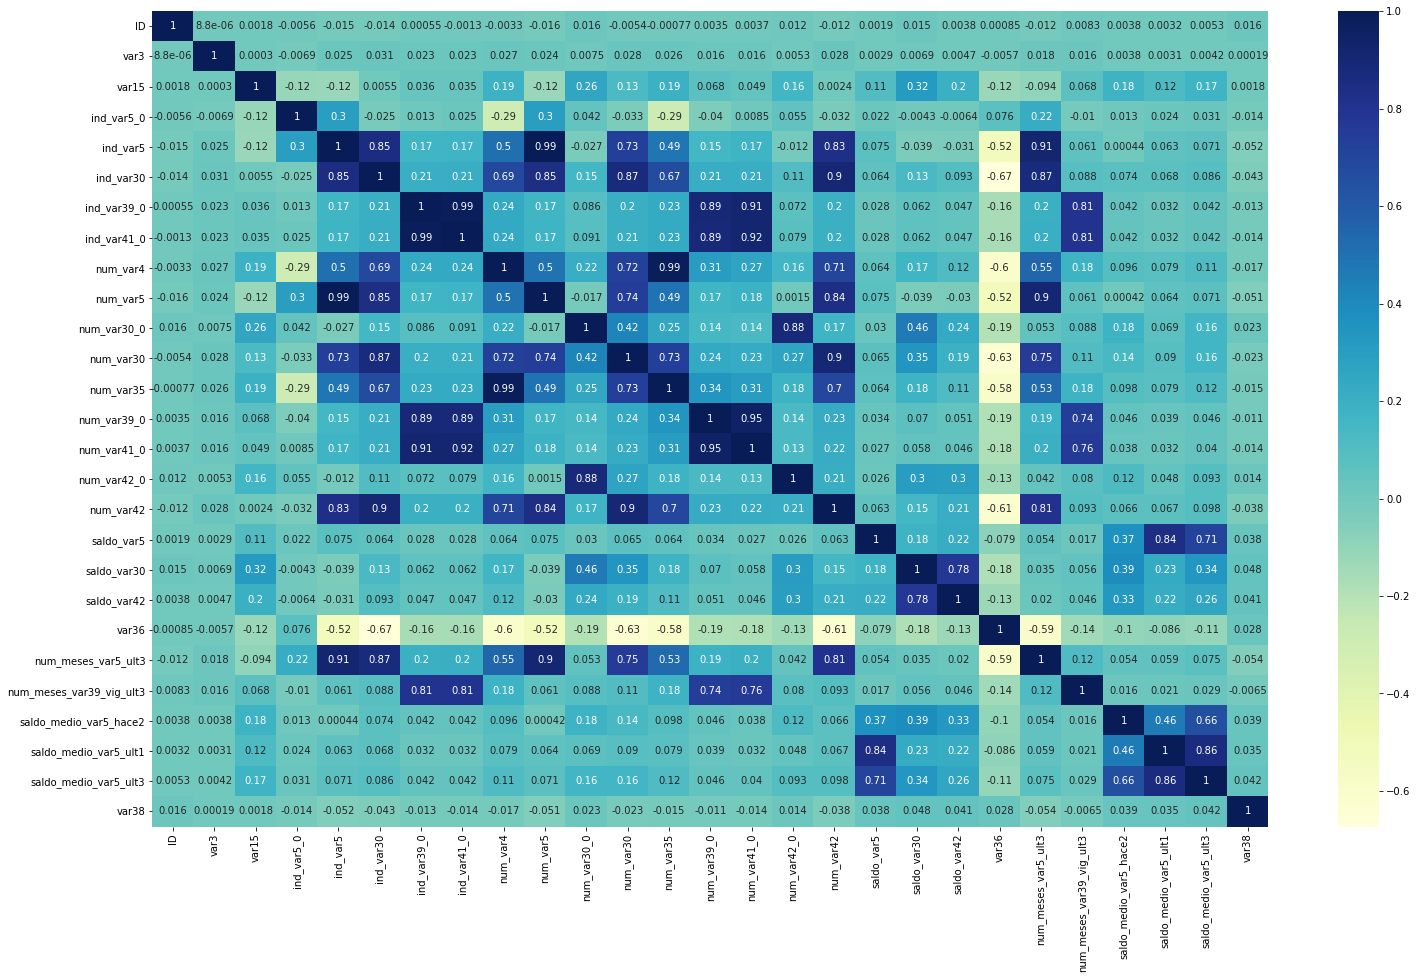

In [30]:
features_df_2 = train_data.loc[:, (train_data==0).mean() < .40] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_2.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_2.corr(), annot=True,cmap="YlGnBu")

Features_shape	(13999, 29) Label_shape	(13999,)


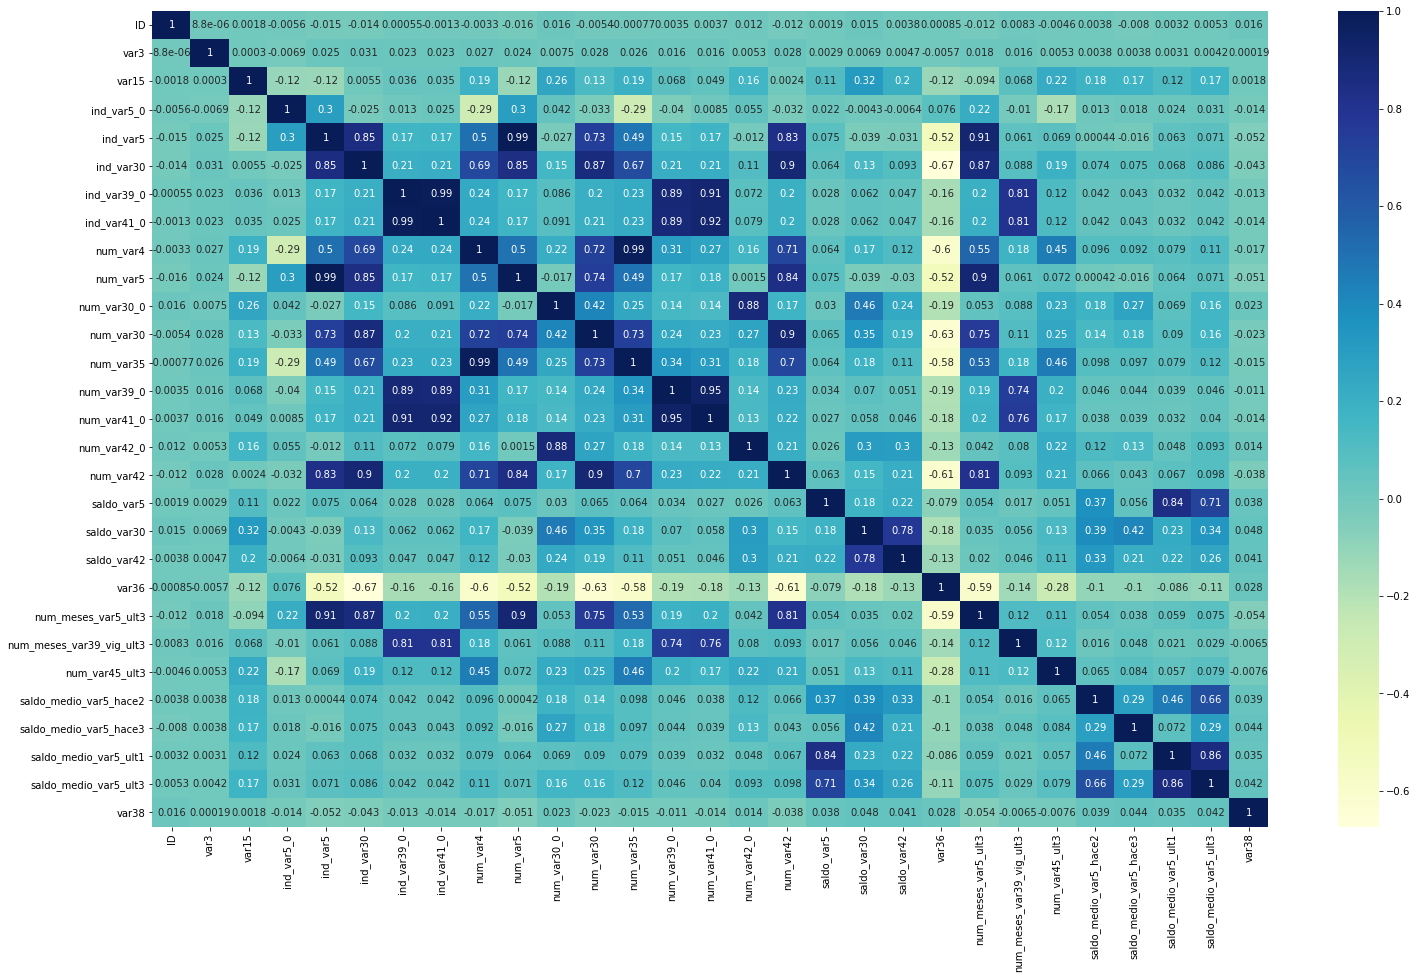

In [31]:
features_df_3 = train_data.loc[:, (train_data==0).mean() < .60] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_3.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_3.corr(), annot=True,cmap="YlGnBu")


Features_shape	(13999, 33) Label_shape	(13999,)


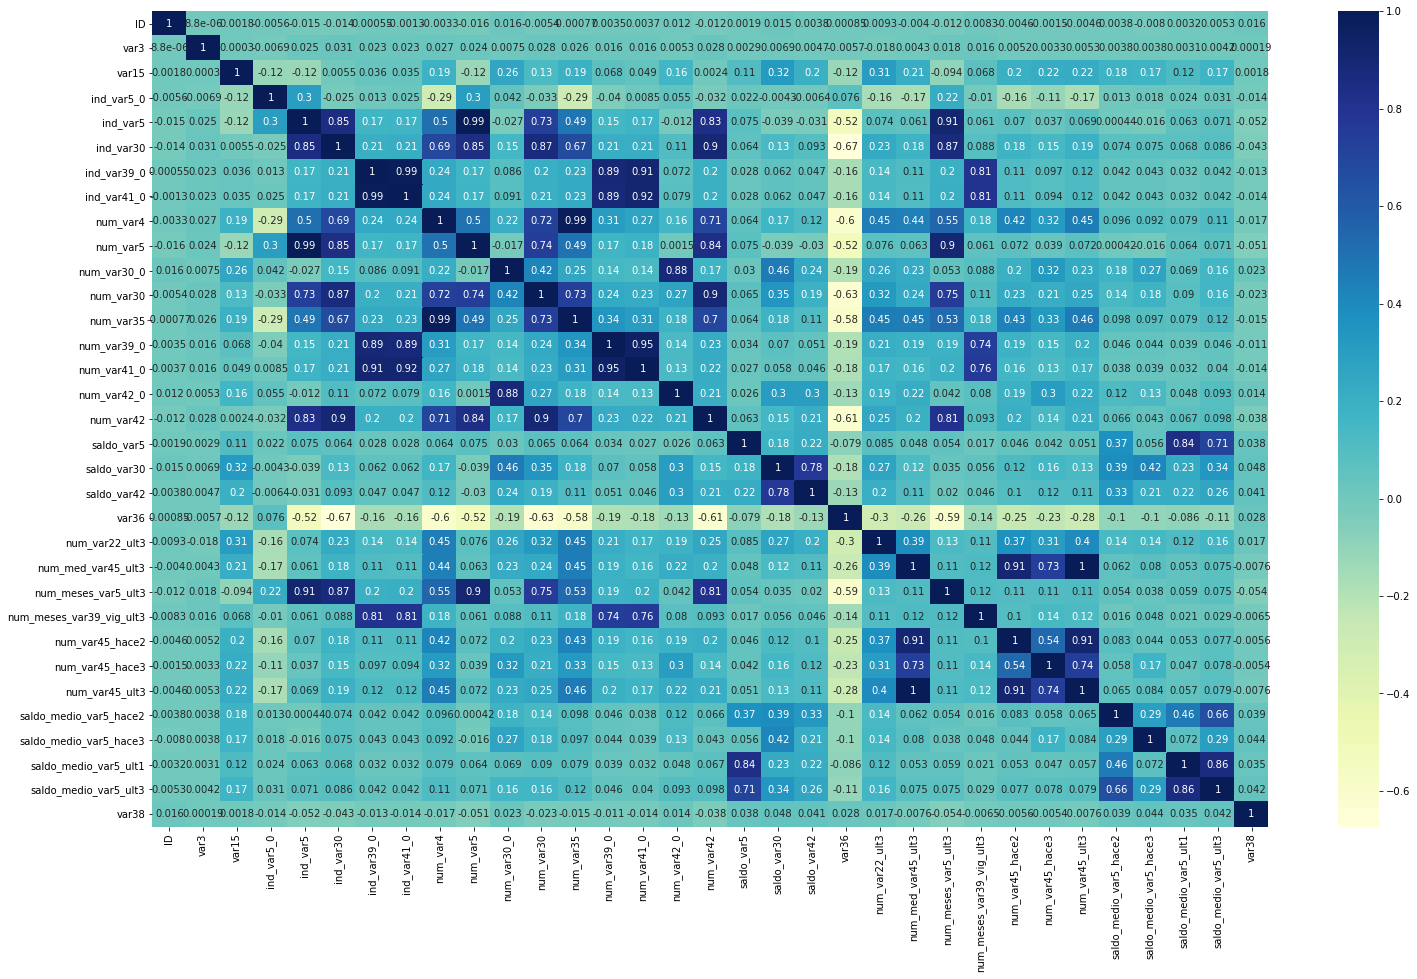

In [32]:
features_df_4 = train_data.loc[:, (train_data==0).mean() < .70] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_4.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_4.corr(), annot=True,cmap="YlGnBu")

Features_shape	(13999, 35) Label_shape	(13999,)


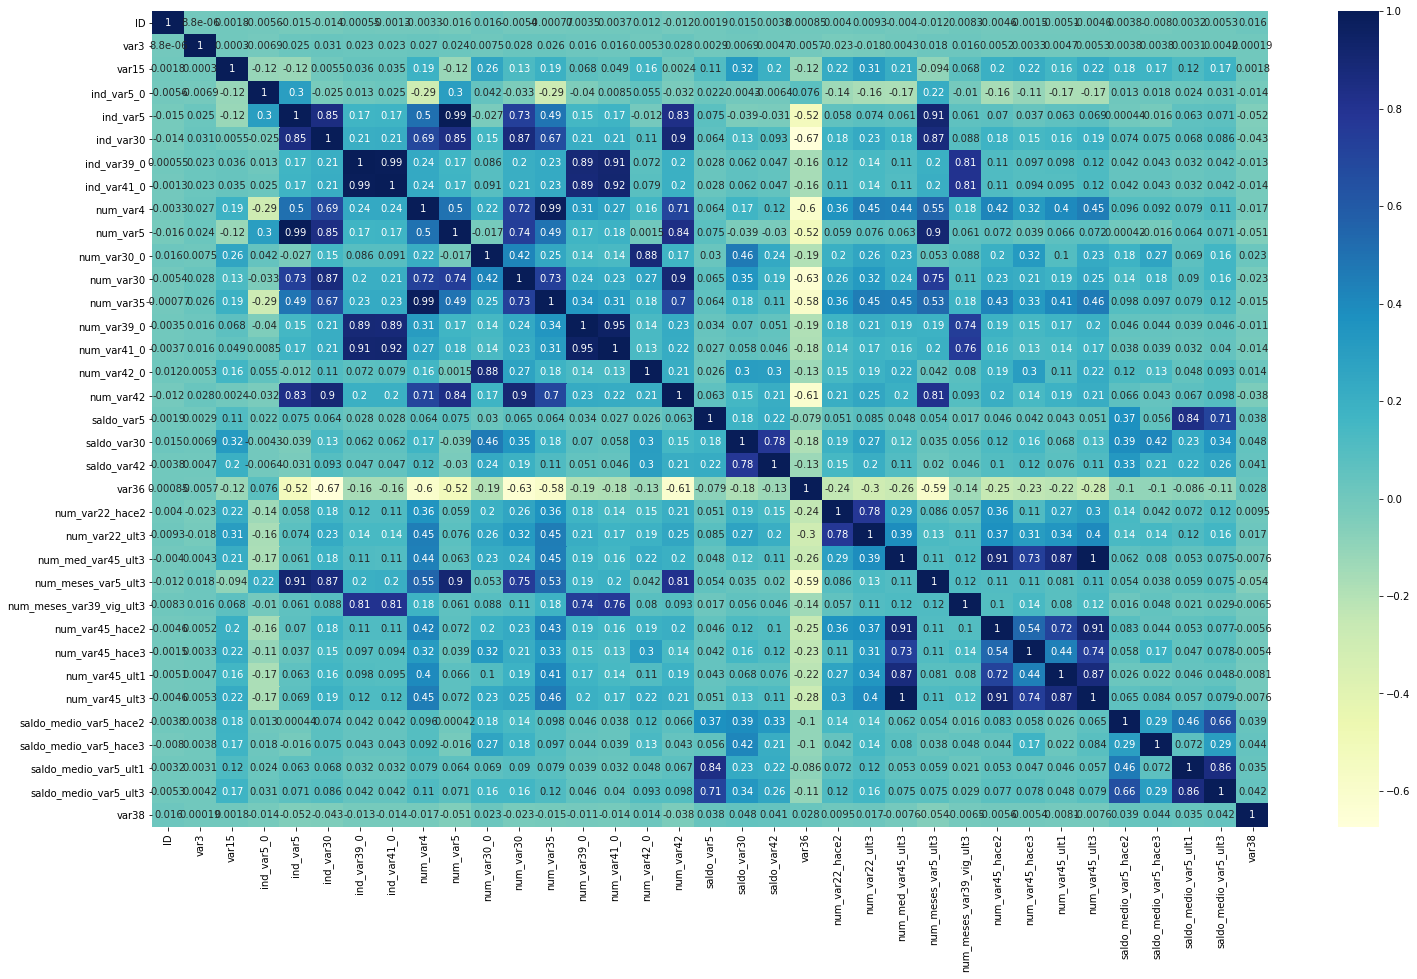

In [33]:
features_df_5 = train_data.loc[:, (train_data==0).mean() < .80] #Drop columns with more than 70% zeros
print('Features_shape\t{} Label_shape\t{}'.format(features_df_5.shape,train_data['TARGET'].shape))
# features_df['ind_var30'].hist()
plt.figure(figsize=(25,15)) 
sns.heatmap(features_df_5.corr(), annot=True,cmap="YlGnBu")

In [39]:
set(features_df_4.columns).symmetric_difference(features_df_5.columns)

{'num_var22_hace2', 'num_var45_ult1'}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD4AB0ED60>,
      dtype=object)

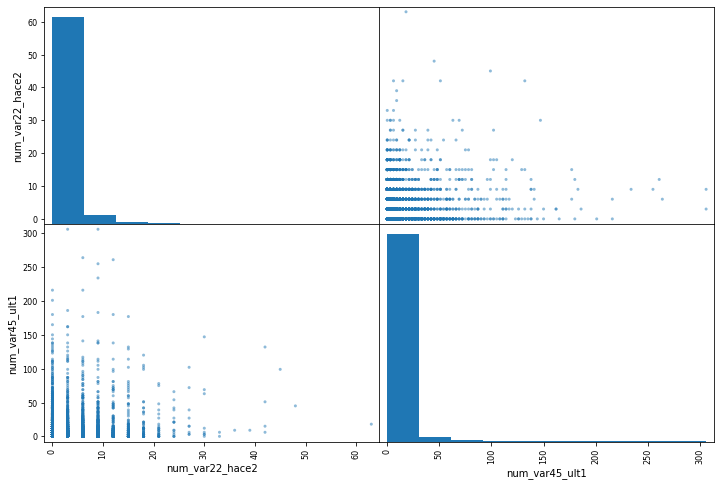

In [50]:
import pandas as pd
from pandas.plotting import scatter_matrix
from seaborn import scatterplot
attributes = ['num_var22_hace2','num_var45_ult1']
scatter_matrix(train_data[attributes], figsize=(12, 8))

##### 1st Hypothesis

As observed 70% zeros has maximum better to cover 33 feature 


In [644]:
def remove_unwanted_features(df):
    df=df.astype(object)
    df = train_data.loc[:, (train_data==0).mean() < .7]   #Drop columns with more than 70% zeros
    return df    
train_df=remove_unwanted_features(train_data)

In [292]:
# from IPython.display import IFrame
# wiki=IFrame('https://en.wikipedia.org/wiki/Pearson_correlation_coefficient',width=1000,height=400)
# display(wiki)


##### Starting for ML models building

In [53]:
X=train_df
y=train_data['TARGET'].astype(bool).astype(int)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,roc_curve,roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
# !pip install pandas_ml
# !pip install scikit-learn
# from pandas_ml import ConfusionMatrix

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
Random_forest=RandomForestClassifier(n_estimators=250)
Random_forest.fit(X_train,y_train)
y_pred=Random_forest.predict(X_test)
score=Random_forest.score(X_test,y_test)
print('Random_forest_model score: '.format(score))

Random_forest_model score: 


In [56]:
plot_cm=pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm


Predicted,0,1,All
Actual,,,
0,3109,59,3168
1,292,40,332
All,3401,99,3500


In [58]:
f1_score_wo_undersampling=f1_score(y_test,y_pred)
print('f1_score:\t{}'.format(f1_score_wo_undersampling))


f1_score:	0.1775700934579439


In [59]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3168
           1       0.40      0.11      0.18       332

    accuracy                           0.90      3500
   macro avg       0.65      0.55      0.56      3500
weighted avg       0.86      0.90      0.87      3500



### As we seen lots of imbalanced data is present our model is more biased towards zero 
### Handling Imbalance Data

###### Undersampling  ---Used
Synthetic Minority Oversampling Technique Smote and Smogn 

In [353]:
# !pip install imblearn

In [72]:
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot

In [64]:
nearmiss=NearMiss()
X_res,y_res=nearmiss.fit_sample(X,y)
print('features shape:\t{}\n Labels shape:\t{}\n'.format(X_res.shape,y_res.shape))

features shape:	(2568, 33)
 Labels shape:	(2568,)



In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 30)
print('X_train_shape: {}\nX_test_shape: {}\n'.format(X_train.shape,X_test.shape))

X_train_shape: (2054, 33)
X_test_shape: (514, 33)



In [66]:
Random_forest=RandomForestClassifier(n_estimators=200)
Random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [67]:
prediction=Random_forest.predict(X_test)

In [68]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       258
           1       0.90      0.89      0.89       256

    accuracy                           0.89       514
   macro avg       0.89      0.89      0.89       514
weighted avg       0.89      0.89      0.89       514



In [69]:
plot_cm=pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm

Predicted,0,1,All
Actual,,,
0,232,26,258
1,28,228,256
All,260,254,514


In [70]:
print('F1_score:',f1_score(y_test,prediction))

F1_score: 0.8941176470588235


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.956


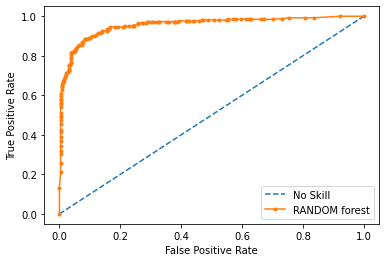

In [73]:

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = Random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RANDOM forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# roc_curve(y)

### We will Test our Mode for Test Data Provided 
We will get only columns used for training for prediction, There will some use to be further investigated 

In [75]:
intersection_columns=test_data.columns& X_train.columns 
X_test_data=test_data[intersection_columns]
X_test_data

,ID,var3,var15,ind_var5_0,ind_var5,ind_var30,ind_var39_0,ind_var41_0,num_var4,num_var5,...,num_meses_var5_ult3,num_meses_var39_vig_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,64252,2,42,1,1,1,1,1,2,3,...,3,2,0,0,0,107.19,23.22,177.87,102.75,117310.979
1,31278,2,38,1,1,1,1,1,2,3,...,3,2,0,6,6,2355.30,108.63,3302.97,1922.31,42403.350
2,148245,2,23,1,1,1,1,1,1,3,...,3,1,0,0,0,3.00,0.33,3.00,2.10,238795.140
3,133657,2,25,1,1,1,1,1,1,3,...,3,1,0,0,0,90.00,5.82,90.00,61.95,105854.070
4,68463,2,25,1,1,1,1,1,1,3,...,3,2,0,0,0,3.00,2.70,3.00,2.91,81031.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,13465,2,44,1,0,0,1,1,0,0,...,0,2,0,0,0,0.00,0.00,0.00,0.00,43675.170
5802,72921,2,55,1,1,1,1,1,2,3,...,3,2,0,30,36,12622.71,1.59,18813.96,10479.42,38451.450
5803,140690,2,23,1,1,1,1,1,1,3,...,1,1,0,0,9,0.00,0.00,27.00,27.00,460707.720
5804,27590,2,23,1,1,1,1,1,1,3,...,2,2,3,0,6,674.97,0.00,4050.00,2362.50,75645.240


In [82]:
y_pred=Random_forest.predict(X_test_data)


In [83]:
#print shape
print(len(test_data[y_pred==0]))
print(len(test_data[y_pred!=0]))

1085
4721


#### Target was achieved but still will try to use oversampling
##### Undersampling may have miss some information 

#### Synthetic Minority Oversampling Technique (SMOTE)
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [84]:
from imblearn.over_sampling import SMOTE


In [85]:
smote=SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)
X_train_res, y_train_res=smote.fit_sample(X_train,y_train.ravel())


In [86]:
print(X_train_res.shape)
print(y_train_res.shape)

(17824, 33)
(17824,)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state = 30)

In [120]:
Random_forest_model=RandomForestClassifier(n_estimators=200,criterion='gini')
Random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=200)

In [121]:
y_pred=Random_forest_model.predict(X_test)

In [152]:
yrand_forest_predict=Random_forest_model.predict(X_test_data)
print(len(yrand_forest_predict[yrand_forest_predict!=0]))
print(len(yrand_forest_predict[yrand_forest_predict==0]))


459
5347


In [122]:
plot_cm=pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
plot_cm

Predicted,0,1,All
Actual,,,
0,2079,122,2201
1,153,2102,2255
All,2232,2224,4456


In [123]:
f1_score(y_test,y_pred)

0.9386023665996874

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


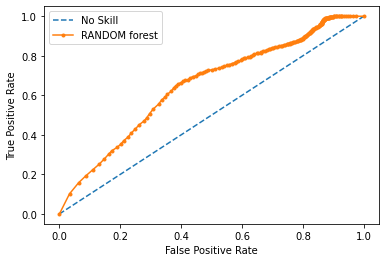

In [124]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = Random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RANDOM forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# roc_curve(y)

In [125]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [92]:
# w = 50
# # model=RandomForestClassifier(n_estimators=200,class_weight={0: 1, 1: w})
# model=RandomForestClassifier(n_estimators=200,class_weight='balanced_subsample')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [93]:
# scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [105]:
# print('Mean ROC AUC: %.3f' % mean(scores))

###### Bagging Method for Imbalance data
###### Undersampling
###### SMOTE



##### Boosting Method

In [571]:
!pip install xgboost

In [97]:
from xgboost import XGBClassifier

In [126]:
XGmodel=XGBClassifier(verbosity=3,enable_categorical=True)
X

[17:22:02] ======== Monitor: Learner ========
[17:22:02] Configure: 0.000589s, 1 calls @ 589us

[17:22:02] ======== Monitor: GBTree ========
[17:22:02] ======== Monitor: TreePruner ========


,ID,var3,var15,ind_var5_0,ind_var5,ind_var30,ind_var39_0,ind_var41_0,num_var4,num_var5,...,num_meses_var5_ult3,num_meses_var39_vig_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,142882,2,55,1,1,1,1,1,3,3,...,3,2,0,0,0,30.00,10.65,24.27,21.63,59375.97
1,116073,2,26,1,1,1,1,1,1,3,...,2,1,0,0,0,3.00,0.00,3.00,3.00,117951.42
2,40727,2,31,1,1,1,1,1,3,3,...,3,2,12,45,96,230.52,38.58,682.20,317.10,81164.61
3,96753,89,55,0,0,0,1,1,1,0,...,0,2,6,0,6,0.00,0.00,0.00,0.00,137912.85
4,105319,2,24,1,1,1,1,1,1,3,...,3,1,0,0,0,3.00,0.27,3.00,2.10,40407.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,30124,2,28,1,1,1,1,1,1,3,...,3,2,3,3,12,30.00,16.08,30.00,25.35,197302.95
13995,77621,2,24,1,1,1,0,0,1,3,...,3,0,0,0,0,3.00,2.79,3.00,2.94,119817.09
13996,84866,2,23,1,1,1,1,1,1,3,...,3,2,0,0,0,3.00,0.63,3.00,2.22,116681.34
13997,80860,2,9,0,0,1,0,0,1,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,184301.91


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state = 30)

In [127]:
XGmodel.fit(X_train,y_train)
y_xgpred=XGmodel.predict(X_test)
plot_cm=pd.crosstab(y_test,y_xgpred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:12] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[17:22:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:22:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 

In [128]:
print(plot_cm)
print(f1_score,f1_score(y_test,y_xgpred))

Predicted     0     1   All
Actual                     
0          2079   122  2201
1           162  2093  2255
All        2241  2215  4456
<function f1_score at 0x000001FD3EC88700> 0.9364653243847875


In [129]:
test_pred=XGmodel.predict(X_test_data)

In [130]:
print(len(test_pred[test_pred==0]))
print(len(test_pred[test_pred!=0]))

5270
536


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.983


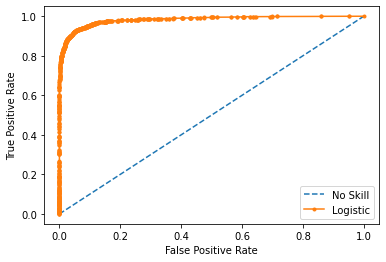

In [131]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
lr_probs =XGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [146]:
# len(test_pred)
if 'XGboost_classification_results' not in test_data.columns:
    test_data['XGboost_classification_results']=test_pred
else:
    print('Already')

Already


In [148]:
test_data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace3,saldo_medio_var33_ult3,saldo_medio_var44_hace3,var38,XGbosst_classification_results,XGboost_classification_results
0,64252,2,42,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,117310.979,0,0
1,31278,2,38,0.00,509.70,509.7,0.0,0.0,509.70,509.7,...,0.0,0,0,0,0.0,0.0,0.0,42403.350,0,0
2,148245,2,23,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,238795.140,0,0
3,133657,2,25,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,105854.070,0,0
4,68463,2,25,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,81031.830,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,13465,2,44,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,43675.170,0,0
5802,72921,2,55,1897.98,510.72,650.4,0.0,0.0,510.72,650.4,...,0.0,0,0,0,0.0,0.0,0.0,38451.450,0,0
5803,140690,2,23,90.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,460707.720,0,0
5804,27590,2,23,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0.0,0.0,0.0,75645.240,0,0


In [149]:
test_data=test_data.drop(columns='XGbosst_classification_results')

In [150]:
test_data.to_csv('../Datasets/XGboostclassification.csv')
